# Deterministic Models: Systems of Differential Equations

In [2]:
import numpy as np
import scipy.integrate as spi
import scipy.linalg as la
import matplotlib.pyplot as plt

print("packages imported")

packages imported


## Learning Goals

* Classify systems of differential equations: order, dimension, linear, autonomous
* Transform higher order systems of differential equations into first order systems
* Compute and visualize numerical solutions of systems of differential equations
* Compute and classify equilibrium solutions of autonomous differential equations

## Prelecture Readings

* [MATH 360 > Differential Equations > Systems of Equations](https://ubcmath.github.io/MATH360/deterministic/differential/systems.html)
* [Mathematical Python > Differential Equations > Systems of Equations](https://patrickwalls.github.io/mathematicalpython/differential-equations/systems/)

## Clicker Questions

1. Given the following equations,
$$\textrm{I.} ~~y^{\prime} + y = \cos(t)~~~ \textrm{II.} ~~ty^{\prime} + y^2 = 1 ~~~ \textrm{III.} ~~y^{\prime} + y = 0,$$
which of the folowing forms a linear system of equations?

   A. I. and II.

   B. II. and III.

   C. I. and III.

   D. I., II., and III.

2. Suppose we have the system of equations:
\begin{align*}
ty^{\prime \prime} + y^{\prime} + y^2 &= 1,\\
ty^{\prime} + y^3 &= 1,\\
y^{\prime} + y^4 &= \cos(t).
\end{align*}
What is the order of the system?

   A. First order

   B. Second order

   C. Third order

   D. Fourth order

3. To reduce a higher order differential equation of order $j$ into a system, how many new variables do we need?

   A. $j$

   B. $j+1$

   C. $j-1$

   D. $j-2$

## Process for writing as a first order system

1. Introduce a *new* variable for each unknown function and its derivatives up to one less than the order of the system.
2. Solve the differential equation for the highest order derivative, and then replace with the new variables.

E.g., $my^{\prime \prime}+cy^{\prime}+ky = f(t),$ where $m,c,k \in \mathbb{R}.$

Unknown function is $y.$ Order is $2$ $\rightarrow$ need variable new variable for $y$ and $y^{\prime}.$

\begin{align*}
u_0 & = y\\
u_1 & = y^{\prime}
\end{align*}

Then rearrange the differential equation for $y^{\prime \prime}$ and replace the variables.
\begin{align*}
y^{\prime \prime} &= \frac{1}{m} \left( f(t) - cy^{\prime} - ky \right) \\
\implies u_1^{\prime} & = \frac{1}{m} \left( f(t) - cu_1 - ku_0 \right).
\end{align*}
This gives us an equation for $u_1^{\prime}.$  To complete system, also want an equation for $u_0^{\prime}.$

\begin{align*}
u_0^{\prime} & = y^{\prime} \\
\implies u_0^{\prime} & = u_1
\end{align*}

Our system is then
\begin{align*}
u_0^{\prime} & = u_1,\\ 
u_1^{\prime} & = \frac{1}{m} \left( f(t) - cu_1 - ku_0 \right).
\end{align*}

## Systems of First Order Differental Equations

Write the following system as a first order system:

\begin{align*}
m_1 x_1'' &= k(x_2 - x_1) \\
m_2 x_2'' &= -k(x_2 - x_1)
\end{align*}

The system is a model of two masses attached by a spring. See [Notes of Diffy Qs: Example 3.1.3](https://www.jirka.org/diffyqs/html/sec_introtosys.html).

**Solution.**  There are two unknown functions here: $x_1$ and $x_2$.  Both have order $2$, so we need new variables for $x_1,x_1^{\prime},x_2,$ and $x_2^{\prime}.$

Let $u_0 = x_1$, $u_1 = x_1'$, $u_2 = x_2$, $u_3 = x_2'.$  The new system of equations is then:

\begin{align*}
u_0' &= u_1 \\
u_1' &= \frac{k}{m_1}(u_2 - u_0) \\
u_2' &= u_3 \\
u_3' &= -\frac{k}{m_2}(u_2 - u_0).
\end{align*}

Write the following vector equation as a first order system:

$$
\frac{d^2 \mathbf{x}}{dt^2} = -\frac{\mathbf{x}}{\| \mathbf{x} \|^3}
$$

where $\mathbf{x}(t) = (x_1(t),x_2(t))$. This is the equation of motion for planetary motion. See [MATH360 > Objects in Motion > Planetary Motion](https://ubcmath.github.io/MATH360/deterministic/motion/orbits.html).

**Solution.** Here, $\mathbf{x}(t) = (x_1(t),x_2(t)),$ so there are two unknowns with order two.  We therefore need new variables for $x_1,x_1^{\prime},x_2,$ and $x_2^{\prime}.$

Let $u_0 = x_1$, $u_1 = x_1'$, $u_2 = x_2$, $u_3 = x_2'.$   The new system of equations is then:

$$
\begin{align*}
u_0' &= u_1 \\
u_1' &= -\frac{u_0}{\left( u_0^2 + u_2^2 \right)^{3/2}} \\
u_2' &= u_3 \\
u_3' &= -\frac{u_2}{\left( u_0^2 + u_2^2 \right)^{3/2}}.
\end{align*}
$$

Recall that $\| {\bf{x}} \| = \sqrt{x_1^2+x_2^2}$, so then $\| {\bf{x}} \|^3 = (x_1^2+x_2^2)^{3/2}.$

Write the second order equation as a first order system:

$$
t^2 y'' + t y' + y = 0
$$

This is a called a Cauchy-Euler equations. See [Wikipedia: Cauchy-Euler equation](https://en.wikipedia.org/wiki/Cauchy–Euler_equation).

**Soluiton.** There is one unknown function that is order two.  We therefore need new variables for $y$ and $y^{\prime}.$

Let $u_0 = y$ and $u_1 = y'.$  The new system of equations is:

\begin{align*}
u_0' &= u_1 \\
u_1' &= -\frac{tu_1 + u_0}{t^2}.
\end{align*}

## `scipy.integrate.odeint`

Compute solutions of the system for different initial values:

\begin{align*}
m_1 x_1'' &= k(x_2 - x_1) \\
m_2 x_2'' &= -k(x_2 - x_1)
\end{align*}

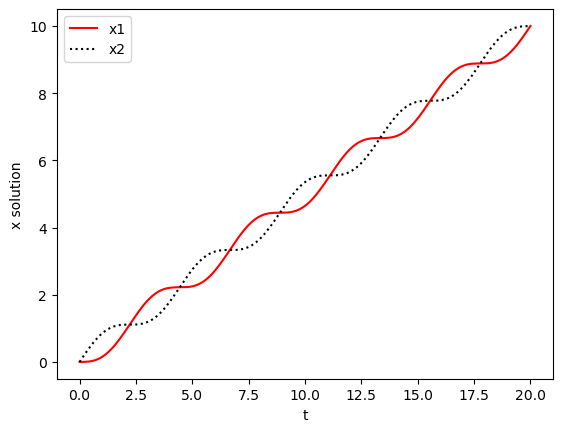

In [3]:
k = 1
m1 = 1
m2 = 1

# u[0] = x1, u[1] = x1', u[2] = x2, u[3] = x2'
def f(u,t):
    dudt = np.zeros(4)
    dudt[0] = u[1]
    dudt[1] = k/m1*(u[2] - u[0])
    dudt[2] = u[3]
    dudt[3] = k/m2*(u[0] - u[2])
    return dudt

t = np.linspace(0,20,200)
u0 = [0,0,0,1]
u = spi.odeint(f,u0,t)
plt.plot(t,u[:,0],'r')
plt.plot(t,u[:,2],':k')
plt.xlabel('t')
plt.ylabel('x solution')
plt.legend(['x1','x2'])
plt.show()

Compute solutions of the following system for different initial values:

$$
\frac{d^2 \mathbf{x}}{dt^2} = -\frac{\mathbf{x}}{\| \mathbf{x} \|^3} 
$$

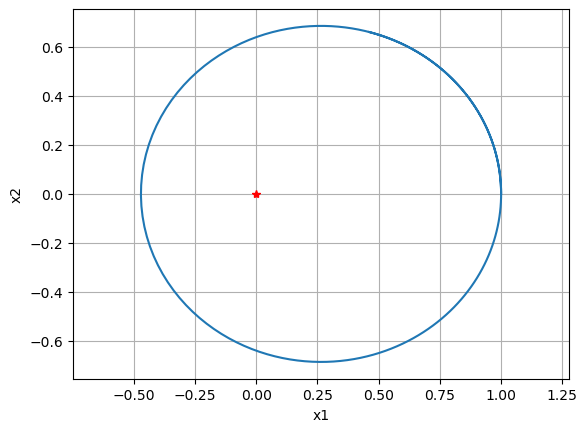

In [4]:
# u[0] = x1, u[1] = x1', u[2] = x2, u[3] = x2'
def f(u,t):
    dudt = np.zeros(4)
    dudt[0] = u[1]
    dudt[1] = -u[0]/(u[0]**2 + u[2]**2)**(3/2)
    dudt[2] = u[3]
    dudt[3] = -u[2]/(u[0]**2 + u[2]**2)**(3/2)
    return dudt

t = np.linspace(0,5,200)

u0 = [1.,0.,0.,.8]
## The period after the value tells python that the number is a float instead of an integer. 
## Python has some different rules for integer classed values, which can cause errors, so using 
## floats is preferred.


u = spi.odeint(f,u0,t)

## sometimes it is more useful to plot x_1 vs x_2 when we have systems of differential equations
## in this case, it will allow us to see the orbit
plt.plot(0,0,'r*')
plt.plot(u[:,0],u[:,2])
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.axis('equal')
plt.show()

Compute the unique solution of the second order equation:

$$
t^2 y'' + t y' + y = 0 \ , \ \ y(1) = 0 \ , \ \ y'(1) = 1
$$

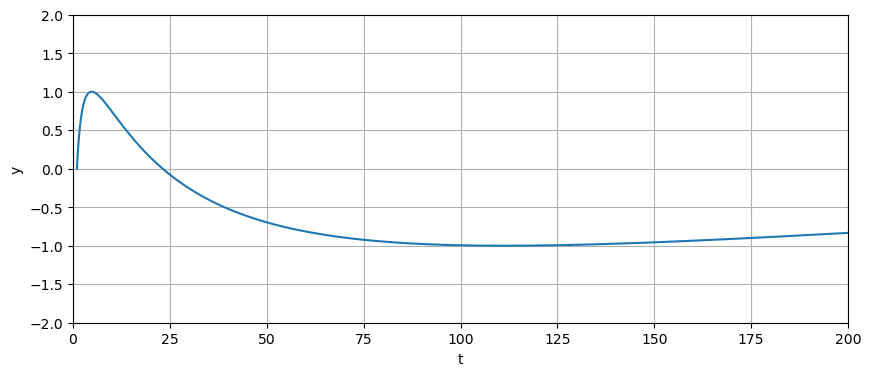

In [5]:
# u[0] = = y, u[1] = y'
## we can also use a lambda function to define the system of equations
## note the order of u and t in the definition, and the use of round and square brackets
f = lambda u,t: np.array([u[1],-u[1]/t - u[0]/t**2])
u0 = [0.,1.]
tf = 200
## here, since our intial conditions are both at t=1, we need to start out t vector at 1
t = np.linspace(1,tf,1000)
u = spi.odeint(f,u0,t)
plt.figure(figsize=(10,4))
plt.plot(t,u[:,0])
plt.xlabel('t')
plt.ylabel('y')
plt.axis([0,tf,-2,2])
plt.grid(True)
plt.show()

Compute solutions of the [Duffing equation](https://en.wikipedia.org/wiki/Duffing_equation):

$$
x'' + \delta x' + \alpha x + \beta x^3 = \gamma \cos(\omega t) \ , \ \ x(0)=x'(0)=0
$$

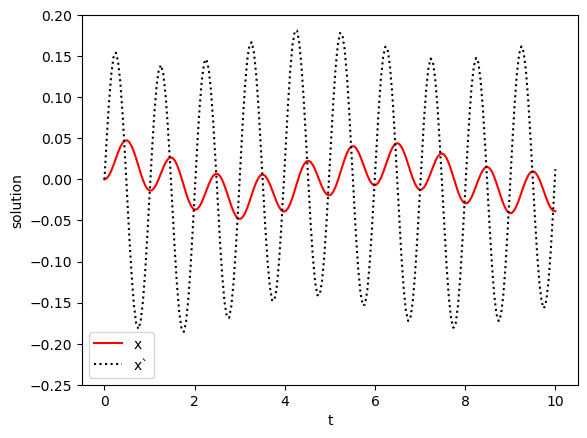

In [6]:
alpha = 1
beta = 0.04
gamma = 1
delta = 0.1
omega = 2*np.pi

# u[0] = x, u[1] = x'
def f(u,t):
    dudt = np.zeros(2)
    dudt[0] = u[1]
    dudt[1] = gamma*np.cos(omega*t)-delta*u[1]-beta*(u[0])**3 - alpha*u[0]
    return dudt


t = np.linspace(0,10,200)
u0 = [0., 0.] 
## initial condition vector has entries corresponding to u_0(0)=0 and u_1(0) = 0
## based on our definitions of u_0 and u_1, this corresponds to x(0) = 0 and x'(0) = 0.
u = spi.odeint(f,u0,t)
plt.plot(t,u[:,0],'r')
plt.plot(t,u[:,1],':k')
plt.xlabel('t')
plt.ylabel('solution')
plt.legend(['x','x`'])
plt.ylim([-0.25,0.2])
plt.show()
## Try playing around with different alpha, beta, gamma, delta, and omega values! In particular
## try playing around with the conditions of undamped and damped oscillations.

Compute solutions of the [Van der Pol equation](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator) for different initial values:

$$
x'' - \mu(1 - x^2)x' + x = 0
$$

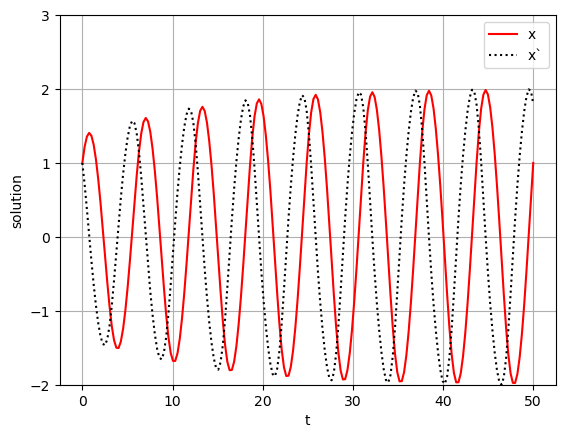

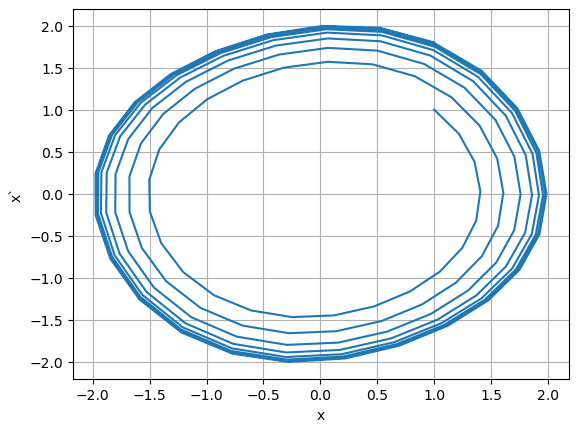

In [7]:
mu = 0.1

# u[0] = x, u[1] = x'
def f(u,t):
    dudt = np.zeros(2)
    dudt[0] = u[1]
    dudt[1] = mu*(1-(u[0])**2)*u[1]-u[0]
    return dudt


t = np.linspace(0,50,200)

u0 = [1.,1.] 

u = spi.odeint(f,u0,t)
plt.plot(t,u[:,0],'r')
plt.plot(t,u[:,1],':k')
plt.xlabel('t')
plt.ylabel('solution')
plt.legend(['x','x`'])
plt.ylim([-2,3])
plt.grid()
plt.show()

## plot a phase portrait
plt.plot(u[:,0],u[:,1])
plt.xlabel('x')
plt.ylabel('x`')
plt.grid()
plt.show()

##Try playing around with different values of mu to see how the solution changes!

## Linear Stability Analysis

Consider the system of differential equations:

\begin{align*}
x' &= 1 - y^2 \\
y' &= x - y
\end{align*}

* Plot trajectories $(x(t),y(t))$ for different initial values $x(0)$ and $y(0)$.
* Find all values $\alpha$ such that if $x(0) = y(0) = \alpha$ then the corresponding solution satisfies $x(t) \to 1$ and $y(t) \to 1$ as $t \to \infty$.
* Find all values $\alpha$ such that if $x(0) = y(0) = \alpha$ then the corresponding solution satisfies $x(t) \to -1$ and $y(t) \to -1$ as $t \to \infty$.

**Solution.**

See plot below -- values pulled off of plot.
* If $x(0)=y(0)=\alpha$ such that $-1 < \alpha < 3.6572$ then $(x(t),y(t)) \to (1,1)$.
* If $x(0)=y(0) \approx 3.6572$ then $(x(t),y(t)) \to (-1,-1)$.
* If $x(0)=y(0) > 3.6572$ or $x(0)=y(0) < -1$ then $x(t) \to \infty$ and $y(t) \to -1$.

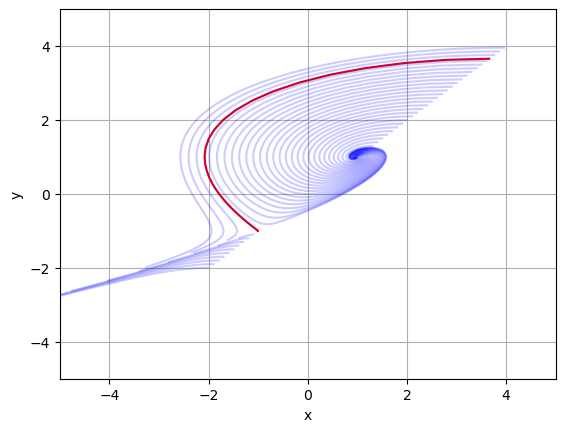

In [ ]:
# u[0] = x, u[1] = y
f = lambda u,t: np.array([1 - u[1]**2,u[0] - u[1]])
t = np.linspace(0,7,100)
alpha = 3.6572
for a in np.arange(1,alpha,0.1):
    u0 = [a,a]
    u = spi.odeint(f,u0,t)
    plt.plot(u[:,0],u[:,1],c='b',alpha=0.2)

u0 = [alpha,alpha]
t = np.linspace(0,7.,100)
u = spi.odeint(f,u0,t)
plt.plot(u[:,0],u[:,1],c='r')

t = np.linspace(0,3,100)
for a in np.arange(alpha,4,0.1):
    u0 = [a,a]
    u = spi.odeint(f,u0,t)
    plt.plot(u[:,0],u[:,1],c='b',alpha=0.2)

t = np.linspace(0,1,100)
for a in np.arange(-2,-1,0.1):
    u0 = [a,a]
    u = spi.odeint(f,u0,t)
    plt.plot(u[:,0],u[:,1],c='b',alpha=0.2)
    
plt.axis([-5,5,-5,5])
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Consider the system of differential equations:

\begin{align*}
x' &= xy + 2y + z^2 \\
y' &= x - y \\
z' &= (x - y)^2 - 3z
\end{align*}

* Find and classify the critical points of the system.
* Plot trajectories for different initial values $x(0)$, $y(0)$ and $z(0)$.

**Solution.** Find the critical points by setting the left-hand side equal to zero and soliving for $x,y,$ and $z$.

In [9]:
## point (0,0,0)
J_0 = np.array([[0.,2.,0.],[1.,-1.,0.],[0.,0.,0.]])
evals1,evecs1 = la.eig(J_0)
print(evals1)

[ 1.+0.j -2.+0.j  0.+0.j]


In [10]:
## point (0,0,0)
J_1 = np.array([[-2.,2.,0.],[1.,-1.,0.],[-8.,8.,0.]])
evals1,evecs1 = la.eig(J_1)
print(evals1)

[ 0.+0.j  0.+0.j -3.+0.j]


Critical points: $(0,0,0)$ is unstable and $(-2,-2,0)$ is an attractor.

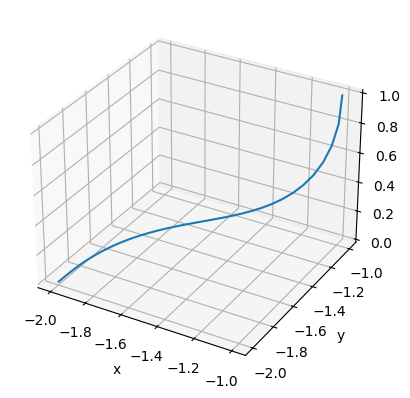

In [11]:
# u[0] = x, u[1] = y, u[2] = z
def f(u,t):
    dudt = np.array([0.,0.,0.])
    dudt[0] = u[0]*u[1] + 2*u[1] + u[2]**2
    dudt[1] = u[0] - u[1]
    dudt[2] = (u[0] - u[1])**2 - 3*u[2]
    return dudt

t = np.linspace(0,7,100)
u0 = [-1,-1,1]
u = spi.odeint(f,u0,t)

plt.figure().add_subplot(projection='3d')
plt.plot(u[:,0],u[:,1],u[:,2])
plt.xlabel('x')
plt.ylabel('y')
plt.show()